# Breast Cancer Wisconsin

## 前書き

特徴は、乳房塊の微細針吸引物（FNA）のデジタル化画像から計算される。  
それらは画像中に存在する細胞核の特徴を記述する。

上述の分離平面は、マルチサーフェス法 - ツリー（MSM-T）[K. P. Bennett、「線形計画法による意思決定ツリー構築」第4回中西部人工知能・認知科学会予稿集、pp。97-101、1992]、線形計画法を用いて決定木を構成する分類法。  
関連する特徴は、1~4個の特徴と1-3個の分離平面の空間内の徹底的な探索を用いて選択された。  

3次元空間における分離平面を得るために使用される実際の線形プログラムは、[K. P. BennettおよびO.L. Mangasarian： "2つの線形に分離不能なセットの堅牢な線形計画法の弁別"、Optimization Methods and Software 1、1992,23-34]。  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#  1.データの準備

## ライブラリのインポート

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# データのインポート

In [5]:
train = pd.read_csv("wdbc.data.csv",header=None)

# 2.データの確認
まずはデータを確認していきます。

In [6]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
col = ["radius","texture","perimeter","area","smoothness","compactness","concavity"
        ,"concave points","symmetry ","fractal dimension" ]

data_columns = ["ID","diagnosis"]
col_plus = ["mean","std","worst"]

In [8]:
for i1 in range(3):
    for i in col:
        data_columns.append(i+"_"+col_plus[i1])

In [9]:
len(data_columns)

32

In [10]:
train.columns = data_columns

In [11]:
train.head()

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry _worst,fractal dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


これでひとまずデータの形が出来ました。  
次にデータの欠損を確認していきましょう。

In [12]:
train.isnull().sum()

ID                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry _mean             0
fractal dimension_mean     0
radius_std                 0
texture_std                0
perimeter_std              0
area_std                   0
smoothness_std             0
compactness_std            0
concavity_std              0
concave points_std         0
symmetry _std              0
fractal dimension_std      0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry _worst            0
fractal dimension_worst    0
dtype: int64

欠損が無いことが確認できました。  
次にデータの形を確認して見ましょう。

In [13]:
train.dtypes

ID                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry _mean             float64
fractal dimension_mean     float64
radius_std                 float64
texture_std                float64
perimeter_std              float64
area_std                   float64
smoothness_std             float64
compactness_std            float64
concavity_std              float64
concave points_std         float64
symmetry _std              float64
fractal dimension_std      float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

データの中にカテゴリ変数が混ざってることがわかりました。  
実際にどうなっているか見て見ましょう。

In [14]:
train.diagnosis

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [15]:
set(train["diagnosis"])

{'B', 'M'}

"diagnosis"はNとRの２種類になってることがわかりました。  
まずはこのカテゴリデータを直さないと学習できません。  
"diagnosis"はラベルエンコーダーを数値データに変えましょう。

# 3.データの整形


In [16]:
out_label = {'M':0, 'B':1}
train["diagnosis"] = train["diagnosis"].map(out_label)

In [17]:
train.head()

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry _worst,fractal dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


これで全てのデータを数値データに変えることができました。

データ型の列に欠損値がある場合、SVMではそれらをランダムに欠損した値として解釈します。質的データの欠損値は最頻値に、量的データの欠損値は平均値に自動的に置換されます。

次に統計値をみて異常値が無いか確かめましょう。

In [18]:
pd.set_option('display.max_columns', 50)

In [19]:
train.describe()

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry _mean,fractal dimension_mean,radius_std,texture_std,perimeter_std,area_std,smoothness_std,compactness_std,concavity_std,concave points_std,symmetry _std,fractal dimension_std,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry _worst,fractal dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


特に問題はなさそうですね。　　

## 3.1 フューチャースケーリング

次はフューチャースケーリングをしていきましょう。

フューチャースケーリングをする理由は2つあります。
大きい値の範囲をとる特徴量に引きずられないようにします。  
[0,10]での1と2の違いは1だけですが，[0,10000]での1の100の違いよりもずっと重要です。  
すなわち，これらを対等に比較するために，それぞれの特徴量を同じ範囲にスケールしてあげる必要があります。

カーネル関数は特徴ベクトルの内積を用いて計算するので，スケーリングを行わずに計算すると，大きい値×小さい値となり，情報落ちする可能性があります。

今回使うSVMの分類は、数値が大きすぎると引っ張られてしまうので、標準化していきます。

In [20]:
def normalization(X):
    norma = (X - X.mean()) / X.std()
    return norma

In [21]:
target_train = train["diagnosis"]
train = normalization(train)
train["diagnosis"] = target_train

In [22]:
train.head()

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry _mean,fractal dimension_mean,radius_std,texture_std,perimeter_std,area_std,smoothness_std,compactness_std,concavity_std,concave points_std,symmetry _std,fractal dimension_std,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry _worst,fractal dimension_worst
0,-0.236197,0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,2.830540,2.485391,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,-0.236196,0,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,0.263095,0.741749,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,0.431362,0,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,0.850180,1.180298,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,0.431741,0,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,0.286341,-0.288125,0.689095,2.741868,0.818798,1.114027,4.728520,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,0.431821,0,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,1.272070,1.189310,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


次に今回の目的変数の乳がん(diagnosis)と相関を見ていきましょう。

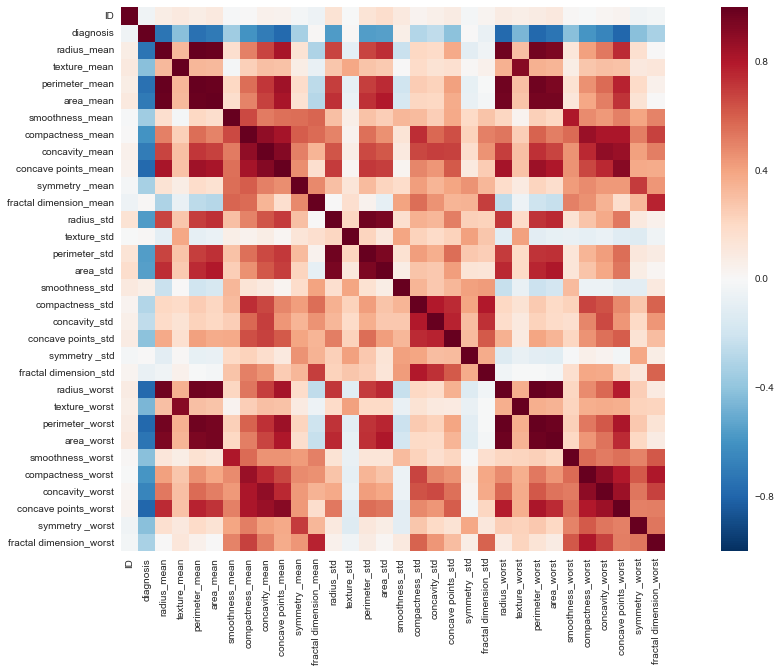

In [23]:
plt.figure(figsize=(20, 10))

sns.heatmap(train.corr(),square=True)

plt.show()

In [24]:
train.corr().diagnosis.sort_values()

concave points_worst      -0.793566
perimeter_worst           -0.782914
concave points_mean       -0.776614
radius_worst              -0.776454
perimeter_mean            -0.742636
area_worst                -0.733825
radius_mean               -0.730029
area_mean                 -0.708984
concavity_mean            -0.696360
concavity_worst           -0.659610
compactness_mean          -0.596534
compactness_worst         -0.590998
radius_std                -0.567134
perimeter_std             -0.556141
area_std                  -0.548236
texture_worst             -0.456903
smoothness_worst          -0.421465
symmetry _worst           -0.416294
texture_mean              -0.415185
concave points_std        -0.408042
smoothness_mean           -0.358560
symmetry _mean            -0.330499
fractal dimension_worst   -0.323872
compactness_std           -0.292999
concavity_std             -0.253730
fractal dimension_std     -0.077972
ID                        -0.039769
symmetry _std              0

負の相関が大きいものがわかりました。

# 3.2不均衡データ問題
今回のカーネルでは分類を扱います。  
今あるデータが１：１のデータになっていない場合もあります。  
実世界の問題は，99%と1%といったように，クラスのデータ数に大きく差が開いている場合がよくあります。  
例えば重病患者とそうでない人を分類したいなどの場合は，クラスのデータ数にかなりの偏りが生じ，予測精度が大きく低下してしまいます。

実際にターゲットがどの様になっているか確認していきましょう。


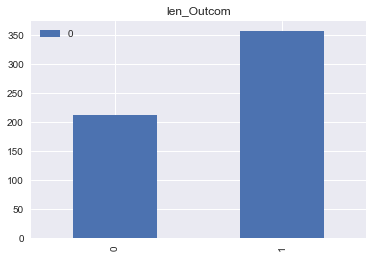

In [25]:
pd.DataFrame([sum(train["diagnosis"] == 0),sum(train["diagnosis"] == 1)]).plot.bar()
plt.title("len_Outcom")

SVMを使う際不均衡データの解決方法は以下があります。

### パラメータC(コスト)を大きくする

パラメータのところで紹介したパラメータCを大きくすることで，誤りに厳しくすることができます。  
svmでは，全体のコストをオプションで設定できる他に，各クラスごとのパラメータを設定することができます。    
上記の 0:約１５０件 と 1:約５０件 の場合，1のクラスのコストをより大きくしたいので，設定することで 1クラスに対して誤りを厳しくすることができます。

### データ数をそろえる

データ数が揃っていないなら揃えましょう．以下に3つの揃え方をあげます。  
大きい方のクラスを小さい方のクラスにそろえる(アンダーサンプリング)  
大きい方のクラスのデータ数を減らします．この際，ランダムにサンプリングしてしまうと，偏りなくデータを残すことができない可能性があります．なので，クラス内のデータをクラスタリングし，それぞれから一定数サンプリングする，といった方法がよくとられます。  
小さい方のクラスを大きい方のクラスにそろえる(オーバーサンプリング)  
上記とは逆で，小さい方のクラスのデータ数を増やします．単にデータを複製すると過学習をおこしやすいので，k-NNなどを用いて人工的に 捏造 する方法がよくとられます。  
アンダーサンプリングとオーバーサンプリングを組み合わせる(ハイブリッド)
これらの両方を用いて揃えます．SMOTEというアルゴリズムが有名なので，興味のある人は調べてみて下さい。  
だたSMOTEは少し古く，最近はよりよい手法が提案されています。


次に使うデータを作っていきましょう。

# データを分ける
ヒートマップを見てわかった相関の大きいものを学習していきましょう。

In [26]:
x_trains = train[["concave points_worst","perimeter_worst","concave points_mean","radius_worst"]]
y_trains = train.diagnosis

In [27]:
plt_train = train[["diagnosis","concave points_worst","perimeter_worst","concave points_mean","radius_worst"]]

今回使う特徴のプロットを見ましょう。

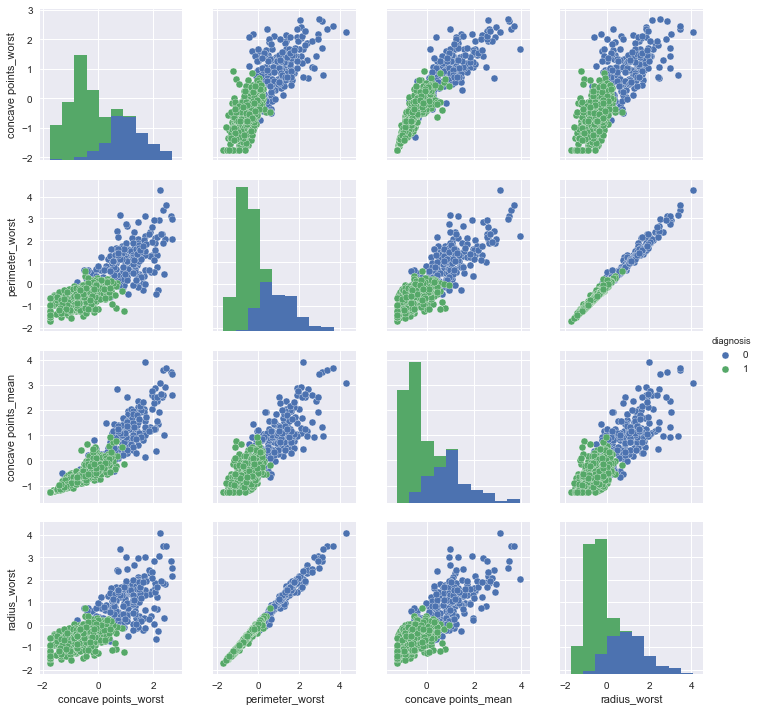

In [28]:
sns.pairplot(plt_train, hue='diagnosis',vars=["concave points_worst","perimeter_worst","concave points_mean","radius_worst"])

# 4.SVMのスクラッチ

In [124]:
# w 重みベクトル　b　バイアス（傾き）
def sign(x,w,b):
    sig = np.dot(x,w.T) + b
    return sign
    
def f(x,w,b):
    sig = np.dot(x,w.T) + b
    y = []
    for i in sig:
        if i.sum() >= 0:
            y.append(1)
        elif i.sum() <0:
            y.append(-1)
    
    return np.array([y])
    

In [125]:
# # クラス分ベクトルを作る
# #該当ラベルだけ外す
# def score(x,w):
#     return np.dot(x,w.T)


# #該当ラベルだけ外す
# delta = 0.5
# def loss(x,y,w):
#     loss = 0
#     #s = score(x,w)
    
#     for i in range(x.shape[0]):
#         s = score(x[i],w)
#         correct_class_score = y[i]
#         for j in range(w.shape[0]):
#             if j == y[i]:
#                 continue  
#             margen = max([0,s[j] - correct_class_score + delta])
#             loss += margen
#     return loss

In [126]:
def gradient_descent(x, y, theta, iterations, alpha = 0.1):
    """
    args:
      alpha: Step size/Learning rate
      iterations: No. of iterations(Number of iterations)
    """
    x = np.array(x)
    y = np.array(y)
    past_costs = []
    past_thetas = []
    J = loss(x,y,theta)
    past_costs.append(J)
    past_thetas.append(theta)
    for i in range(iterations):
        h = f(x,theta,0.5)
        theta = theta - alpha *(1/len(y))*(x.T.dot(h-y))
        cost = (loss(x,y,theta))
        past_costs.append(cost)
        past_thetas.append(theta)

    return past_thetas,past_costs

In [127]:
# クラス分ベクトルを作る
#該当ラベルだけ外す
def score(x,w):
    return np.dot(x,w.T)


#該当ラベルだけ外す
delta = 0.5
def loss(x,y,w):
    loss = 0
    s = score(x,w)
    for i in range(x.shape[0]):
        correct_class_score = y[i]
        for j in range(w.shape[0]):
            if j == y[i]:
                continue  
            margen = max([0,s[j][1] - s[j][0] + delta])
            loss += margen
    return loss

In [128]:
#x = np.array([[2,-3],[4,5],[-6,-8],[2,6],[-3,2]])

x = np.array([[1,1],[-1,-1],[2,2]])
y = np.array([1,0,1])
w = np.array([[0.5,0.5],[1,1]])
b = 0.01
loss(x,y,w)

3.0

In [129]:
f(x,w,b)

array([[ 1, -1,  1]])

In [130]:
gradient_descent(x, y, w,100, alpha = 0.1)

ValueError: shapes (2,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [ ]:
x.shape[0]

In [ ]:
plt.scatter(x.T[0],x.T[1])

In [ ]:
sign(x,w,b)

In [ ]:
for i in xrange(num_train):
    scores = X[i].dot(W)
    correct_class_score = scores[y[i]]
    for j in xrange(num_classes):
      if j == y[i]:
        continue
      margin = scores[j] - correct_class_score + 1 # note delta = 1
      if margin > 0:
        loss += margin
        dW[:,j] += X[i]
        dW[:,y[i]] -= X[i] 

In [ ]:
np.__file__

In [ ]:
def gradient_descent(x, y, theta, iterations, alpha = 0.1):
    """
    args:
      alpha: Step size/Learning rate
      iterations: No. of iterations(Number of iterations)
    """
    x = np.array(x)
    y = np.array(y)
    past_costs = []
    past_thetas = []
    J = compute_cost(x,y,theta,alpha)
    past_costs.append(J)
    past_thetas.append(theta)
    for i in range(iterations):
        h = sigmoid(x,theta)
        theta = theta - alpha *(1/len(y))*(x.T.dot(h-y))
        cost = (compute_cost(x,y,theta,alpha))
        past_costs.append(cost)
        past_thetas.append(theta)

    return past_thetas,past_costs

In [145]:
import numpy
from matplotlib import pyplot
import sys

def f(x, y):
    return x - y

if __name__ == '__main__':

    param = sys.argv

    numpy.random.seed()
    N = 30
    d = 2
    X = numpy.random.randn(N, d)
    T = numpy.array([1 if f(x, y) > 0 else - 1 for x, y in X])
    alpha = numpy.zeros(N)
    print(alpha)
    beta = 1.0
    eta_al = 0.0001 # update ratio of alpha
    eta_be = 0.1 # update ratio of beta
    itr = 1000

    for _itr in range(itr):
        for i in range(N):
            delta = 1 - (T[i] * X[i]).dot(alpha * T * X.T).sum() - beta * T[i] * alpha.dot(T)
            alpha[i] += eta_al * delta
        for i in range(N):
            beta += eta_be * alpha.dot(T) ** 2 / 2

    index = alpha > 0
    w = (alpha * T).T.dot(X)
    b = (T[index] - X[index].dot(w)).mean()

    if '-d' in param or '-s' in param:
        seq = numpy.arange(-3, 3, 0.02)
        pyplot.figure(figsize = (6, 6))
        pyplot.xlim(-3, 3)
        pyplot.ylim(-3, 3)
        pyplot.plot(seq, -(w[0] * seq + b) / w[1], 'k-')
        pyplot.plot(X[T ==  1,0], X[T ==  1,1], 'ro')
        pyplot.plot(X[T == -1,0], X[T == -1,1], 'bo')

        if '-s' in param:
            pyplot.savefig('graph.png')

        if '-d' in param:
            pyplot.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [139]:
def f(x, y):
    return x - y

In [161]:
param = sys.argv

numpy.random.seed()
N = 30
d = 2
X = numpy.random.randn(N, d)
T = numpy.array([1 if f(x, y) > 0 else - 1 for x, y in X])
alpha = numpy.zeros(N)

beta = 1.0
eta_al = 0.0001
itr = 10

for _itr in range(itr):
    for i in range(N):
        delta = 1 - (T[i] * X[i]).dot(alpha * T * X.T).sum() - beta * T[i] * alpha.dot(T)
        alpha[i] += eta_al * delta
    for i in range(N):
        beta += eta_be * alpha.dot(T) ** 2 / 2

index = alpha > 0
w = (alpha * T).T.dot(X)
b = (T[index] - X[index].dot(w)).mean()

In [164]:
delta

0.9685565992221861

In [165]:
alpha

array([0.00096473, 0.00098401, 0.00098603, 0.00099219, 0.00099452,
       0.00098864, 0.00097116, 0.00099521, 0.00100396, 0.00097609,
       0.00096944, 0.0009712 , 0.00099593, 0.00099421, 0.000971  ,
       0.00098508, 0.000978  , 0.00097805, 0.00097255, 0.0009917 ,
       0.0009871 , 0.00097487, 0.0010024 , 0.00099041, 0.0009822 ,
       0.00097233, 0.00099929, 0.0009905 , 0.00098992, 0.00098266])

-0.003471044372999351